

# Association Analysis - Frequent Itemsets and Rule Generation


## Bread Basket Data

The dataset belongs to "The Bread Basket" a bakery located in Edinburgh. The dataset has 21293 entires, over 6000 transactions and 4 columns:


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

ModuleNotFoundError: No module named 'mlxtend'

In [2]:
data = pd.read_csv("BreadBasket.csv")
data = data[data["Item"] != "NONE"]

Text(0.5, 0, 'Items')

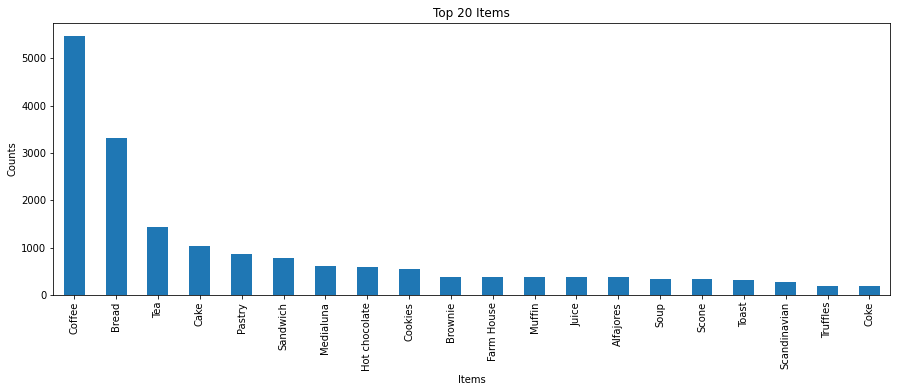

In [3]:
data["Item"].value_counts()[:20].plot(kind = "bar", figsize= [15,5])
plt.title("Top 20 Items")
plt.ylabel("Counts")
plt.xlabel("Items")

In [4]:
len(data["Item"].unique())

94

In [5]:
len(data["Transaction"].unique())

9465

## Data Prep: Convert to One Hot Encoded Transactions


In [6]:
copy = data.copy()
data1 = copy[["Transaction", "Item"]]
data1 = data1.groupby("Transaction")
dataset = data1["Item"].apply(list)
dataset = pd.Series(dataset)
dataset

Transaction
1                                                 [Bread]
2                            [Scandinavian, Scandinavian]
3                           [Hot chocolate, Jam, Cookies]
4                                                [Muffin]
5                                 [Coffee, Pastry, Bread]
                              ...                        
9680                                              [Bread]
9681    [Truffles, Tea, Spanish Brunch, Christmas common]
9682                  [Muffin, Tacos/Fajita, Coffee, Tea]
9683                                     [Coffee, Pastry]
9684                                          [Smoothies]
Name: Item, Length: 9465, dtype: object

In [7]:
trans = TransactionEncoder()
transData = trans.fit(dataset).transform(dataset)
transData

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
# check
test = transData[:4]
trans.inverse_transform(test)

[['Bread'], ['Scandinavian'], ['Cookies', 'Hot chocolate', 'Jam'], ['Muffin']]

In [9]:
transaction = pd.DataFrame(transData, columns = trans.columns_)
transaction

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Create Frequent Itemsets 


In [10]:
apriori= apriori(transaction, min_support = 20/9465, use_colnames = True)

In [11]:
apriori.tail(15)

,support,itemsets
229,0.003909,"(Coffee, Tea, Cookies)"
230,0.003064,"(Coffee, Hot chocolate, Medialuna)"
231,0.003803,"(Coffee, Pastry, Hot chocolate)"
232,0.002536,"(Coffee, Hot chocolate, Sandwich)"
233,0.002747,"(Juice, Coffee, Sandwich)"
234,0.004860,"(Coffee, Pastry, Medialuna)"
235,0.003698,"(Coffee, Tea, Medialuna)"
236,0.002853,"(Coffee, Tea, Muffin)"
237,0.004649,"(Coffee, Tea, Pastry)"
238,0.003592,"(Soup, Coffee, Sandwich)"


## Generate Strong Rules


In [27]:
association= association_rules(apriori, metric = "confidence", min_threshold = 0.5)
association = association[association['lift']>=1.5]
association[association['confidence']>=.5]
#association = association_rules(association, metric="lift", min_threshold=.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Extra Salami or Feta),(Coffee),0.004015,0.478394,0.003275,0.815789,1.705267,0.001355,2.831575
11,(Keeping It Local),(Coffee),0.006656,0.478394,0.005388,0.809524,1.692169,0.002204,2.738431


➡️ _insight about what all the rules have in common here and if that is useful for the bakery_ ⬅️

All the consequents for all antecedents are Coffee, meaning all transactions are likely to purchase coffee in addition. It is useful for the bakery as it is the most popular item. 


   - lift > 3
   - leverage > 0.004
   - conviction > 1.2

In [18]:
lift= association_rules(apriori, metric = "lift", min_threshold = 3)
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coke),(Sandwich),0.019440,0.071844,0.005177,0.266304,3.706722,0.003780,1.265043
1,(Sandwich),(Coke),0.071844,0.019440,0.005177,0.072059,3.706722,0.003780,1.056705
2,(Fudge),(Jam),0.015003,0.015003,0.002536,0.169014,11.265622,0.002311,1.185336
3,(Jam),(Fudge),0.015003,0.015003,0.002536,0.169014,11.265622,0.002311,1.185336
4,(Juice),(Jammie Dodgers),0.038563,0.013207,0.002113,0.054795,4.149041,0.001604,1.043999
5,(Jammie Dodgers),(Juice),0.013207,0.038563,0.002113,0.160000,4.149041,0.001604,1.144568
6,(Juice),(Spanish Brunch),0.038563,0.018172,0.002747,0.071233,3.919879,0.002046,1.057130
7,(Spanish Brunch),(Juice),0.018172,0.038563,0.002747,0.151163,3.919879,0.002046,1.132652
8,(Mineral water),(Sandwich),0.014157,0.071844,0.003275,0.231343,3.220094,0.002258,1.207504
9,(Sandwich),(Mineral water),0.071844,0.014157,0.003275,0.045588,3.220094,0.002258,1.032932


In [19]:
leverage= association_rules(apriori, metric = "leverage", min_threshold = 0.004)
leverage

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
2,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
3,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
6,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
7,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
8,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
9,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682


In [20]:
conviction = association_rules(apriori, metric= "conviction", min_threshold = 1.2)
conviction

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Art Tray),(Coffee),0.004015,0.478394,0.002747,0.684211,1.430224,0.000826,1.651752
1,(Bakewell),(Coffee),0.005071,0.478394,0.003064,0.604167,1.262906,0.000638,1.317741
2,(Extra Salami or Feta),(Coffee),0.004015,0.478394,0.003275,0.815789,1.705267,0.001355,2.831575
3,(Keeping It Local),(Coffee),0.006656,0.478394,0.005388,0.809524,1.692169,0.002204,2.738431
4,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
5,(Salad),(Coffee),0.010460,0.478394,0.006550,0.626263,1.309094,0.001547,1.395648
6,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
7,(Tartine),(Coffee),0.004860,0.478394,0.003064,0.630435,1.317815,0.000739,1.411404
8,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
9,(Vegan mincepie),(Coffee),0.005494,0.478394,0.003170,0.576923,1.205958,0.000541,1.232887


## Find the Maximal Itemsets


In [25]:
support = apriori["support"].tolist()
itemsets = apriori["itemsets"].tolist()
itemsets = [list(x) for x in itemsets]
itemsets

[['Afternoon with the baker'],
 ['Alfajores'],
 ['Art Tray'],
 ['Baguette'],
 ['Bakewell'],
 ['Bread'],
 ['Brownie'],
 ['Cake'],
 ['Chicken Stew'],
 ['Coffee'],
 ['Coke'],
 ['Cookies'],
 ['Eggs'],
 ['Extra Salami or Feta'],
 ['Farm House'],
 ['Focaccia'],
 ['Frittata'],
 ['Fudge'],
 ['Granola'],
 ['Hearty & Seasonal'],
 ['Hot chocolate'],
 ['Jam'],
 ['Jammie Dodgers'],
 ['Juice'],
 ['Keeping It Local'],
 ['Medialuna'],
 ['Mineral water'],
 ['Muffin'],
 ['Pastry'],
 ['Salad'],
 ['Sandwich'],
 ['Scandinavian'],
 ['Scone'],
 ['Smoothies'],
 ['Soup'],
 ['Spanish Brunch'],
 ['Tartine'],
 ['Tea'],
 ['The Nomad'],
 ['Tiffin'],
 ['Toast'],
 ['Truffles'],
 ['Tshirt'],
 ['Vegan mincepie'],
 ['Alfajores', 'Bread'],
 ['Brownie', 'Alfajores'],
 ['Alfajores', 'Cake'],
 ['Coffee', 'Alfajores'],
 ['Alfajores', 'Cookies'],
 ['Hot chocolate', 'Alfajores'],
 ['Juice', 'Alfajores'],
 ['Alfajores', 'Medialuna'],
 ['Alfajores', 'Pastry'],
 ['Alfajores', 'Sandwich'],
 ['Alfajores', 'Tea'],
 ['Coffee', 'Art T